In [985]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [986]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [987]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224555 entries, 0 to 1224554
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1224555 non-null  int64  
 1   kWh       1224555 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.7 MB


In [988]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1224550    0.14
1224551    0.14
1224552    0.14
1224553    0.14
1224554    0.14
Name: kWh, Length: 1224555, dtype: float64

In [989]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1224550    0.14
1224551    0.14
1224552    0.14
1224553    0.14
1224554    0.14
Name: kWh, Length: 1224555, dtype: float64

In [990]:
l=len(conso_data)-1
l

1224554

In [991]:
conso_data['sec']=conso_data['Interval']/1000


In [992]:
conso_data['Wh']=3600000/conso_data['Interval']


In [993]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [994]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224555 entries, 0 to 1224554
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1224555 non-null  int64  
 1   kWh        1224555 non-null  float64
 2   sec        1224555 non-null  float64
 3   Wh         1224555 non-null  float64
 4   cumul(ms)  1224555 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 46.7 MB


In [995]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1224550,26232,0.14,26.232,137.236962,28820759337
1224551,26232,0.14,26.232,137.236962,28820785569
1224552,26566,0.14,26.566,135.511556,28820812135
1224553,25848,0.14,25.848,139.275766,28820837983
1224554,26224,0.14,26.224,137.278829,28820864207


In [996]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

28820864207000

In [997]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 4, 32, 384254)

In [998]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [999]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1000]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1001]:
conso_data['dates']

0         2023-08-21 19:04:54.318254
1         2023-08-21 19:05:16.176254
2         2023-08-21 19:05:38.177254
3         2023-08-21 19:06:00.105254
4         2023-08-21 19:06:21.996254
                     ...            
1224550   2024-07-20 08:50:31.721254
1224551   2024-07-20 08:50:57.953254
1224552   2024-07-20 08:51:24.519254
1224553   2024-07-20 08:51:50.367254
1224554   2024-07-20 08:52:16.591254
Name: dates, Length: 1224555, dtype: datetime64[ns]

In [1002]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:54.318254,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:16.176254,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:38.177254,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:06:00.105254,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:21.996254,21/08/23
...,...,...,...,...,...,...,...
1224550,26232,0.14,26.232,137.236962,28820759337,2024-07-20 08:50:31.721254,20/07/24
1224551,26232,0.14,26.232,137.236962,28820785569,2024-07-20 08:50:57.953254,20/07/24
1224552,26566,0.14,26.566,135.511556,28820812135,2024-07-20 08:51:24.519254,20/07/24
1224553,25848,0.14,25.848,139.275766,28820837983,2024-07-20 08:51:50.367254,20/07/24


In [1003]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('20/07/24', 20, 7, 2024)

In [1004]:
here = now.strftime('%H:%M:%S')
here

'08:53:01'

In [1005]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1006]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 1223504 to 1224554
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1051 non-null   int64         
 1   kWh        1051 non-null   float64       
 2   sec        1051 non-null   float64       
 3   Wh         1051 non-null   float64       
 4   cumul(ms)  1051 non-null   int64         
 5   dates      1051 non-null   datetime64[ns]
 6   days       1051 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 65.7+ KB


In [1007]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1008]:
data = list(df_grp['kWh'])
print(data)


[0.836, 3.7, 4.232, 3.682, 4.189, 4.611, 3.521, 3.407, 3.515, 3.697, 3.773, 3.786, 4.257, 3.809, 3.46, 3.64, 3.324, 3.374, 4.294, 4.003, 4.046, 3.921, 3.443, 4.459, 3.74, 3.761, 4.379, 4.677, 3.796, 3.223, 3.18, 4.004, 3.667, 3.171, 3.793, 4.152, 3.752, 3.57, 4.784, 4.185, 4.545, 3.772, 3.406, 4.308, 3.874, 3.866, 3.435, 4.081, 3.655, 3.398, 4.136, 3.381, 3.889, 3.837, 3.641, 3.749, 4.245, 3.304, 3.869, 2.978, 2.055, 2.041, 2.457, 4.089, 3.724, 4.33, 3.619, 3.915, 3.744, 3.927, 3.98, 4.116, 3.642, 3.159, 3.804, 3.51, 3.625, 3.708, 3.686, 3.237, 3.906, 3.217, 3.79, 3.605, 4.083, 3.607, 3.345, 3.819, 4.062, 4.384, 4.081, 3.998, 4.229, 3.749, 3.923, 3.865, 3.914, 3.743, 4.043, 4.346, 3.888, 3.502, 3.683, 3.674, 3.343, 3.847, 3.994, 4.104, 3.473, 4.176, 3.607, 4.082, 4.527, 3.685, 3.428, 3.578, 4.169, 3.691, 4.082, 3.981, 3.745, 3.591, 5.129, 3.698, 3.766, 4.295, 4.099, 4.724, 4.397, 3.978, 3.784, 4.361, 4.679, 4.201, 4.787, 4.321, 3.717, 4.185, 3.706, 3.632, 3.528, 3.95, 3.67, 3.786, 3.57

In [1009]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1010]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1011]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [1012]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.30681
dtype: float64

In [1013]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.655388
dtype: float64

In [1014]:
last=df_grp.iloc[-1]['kWh']
last

1.051

In [1015]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 1223504 to 1224554
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1051 non-null   int64         
 1   kWh        1051 non-null   float64       
 2   sec        1051 non-null   float64       
 3   Wh         1051 non-null   float64       
 4   cumul(ms)  1051 non-null   int64         
 5   dates      1051 non-null   datetime64[ns]
 6   days       1051 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 65.7+ KB


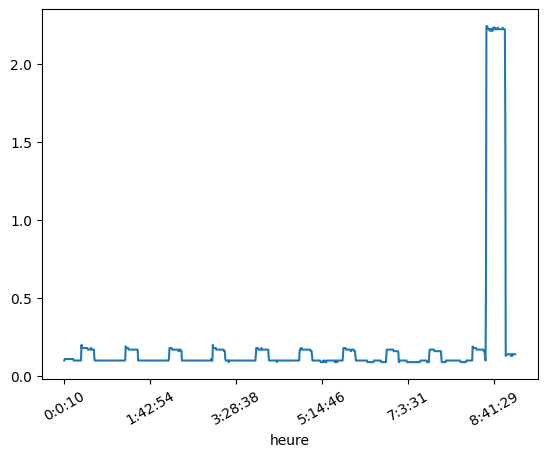

In [1016]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [1017]:
conso_day['heure']


1223504     0:0:10
1223505     0:0:42
1223506     0:1:14
1223507     0:1:47
1223508     0:2:20
            ...   
1224550    8:50:31
1224551    8:50:57
1224552    8:51:24
1224553    8:51:50
1224554    8:52:16
Name: heure, Length: 1051, dtype: object

In [1018]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:10',
              days  kWh
  heure                
  0:0:10  20/07/24  0.1),
 ('0:0:42',
              days   kWh
  heure                 
  0:0:42  20/07/24  0.11),
 ('0:1:14',
              days   kWh
  heure                 
  0:1:14  20/07/24  0.11),
 ('0:1:47',
              days   kWh
  heure                 
  0:1:47  20/07/24  0.11),
 ('0:2:20',
              days   kWh
  heure                 
  0:2:20  20/07/24  0.11),
 ('0:2:54',
              days   kWh
  heure                 
  0:2:54  20/07/24  0.11),
 ('0:3:27',
              days   kWh
  heure                 
  0:3:27  20/07/24  0.11),
 ('0:4:0',
             days   kWh
  heure                
  0:4:0  20/07/24  0.11),
 ('0:4:34',
              days   kWh
  heure                 
  0:4:34  20/07/24  0.11),
 ('0:5:7',
             days   kWh
  heure                
  0:5:7  20/07/24  0.11),
 ('0:5:41',
              days   kWh
  heure                 
  0:5:41  20/07/24  0.11),
 ('0:6:14',
              days  

In [1019]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:10',
  heure
  0:0:10    0.1
  Name: kWh, dtype: float64),
 ('0:0:42',
  heure
  0:0:42    0.11
  Name: kWh, dtype: float64),
 ('0:1:14',
  heure
  0:1:14    0.11
  Name: kWh, dtype: float64),
 ('0:1:47',
  heure
  0:1:47    0.11
  Name: kWh, dtype: float64),
 ('0:2:20',
  heure
  0:2:20    0.11
  Name: kWh, dtype: float64),
 ('0:2:54',
  heure
  0:2:54    0.11
  Name: kWh, dtype: float64),
 ('0:3:27',
  heure
  0:3:27    0.11
  Name: kWh, dtype: float64),
 ('0:4:0',
  heure
  0:4:0    0.11
  Name: kWh, dtype: float64),
 ('0:4:34',
  heure
  0:4:34    0.11
  Name: kWh, dtype: float64),
 ('0:5:7',
  heure
  0:5:7    0.11
  Name: kWh, dtype: float64),
 ('0:5:41',
  heure
  0:5:41    0.11
  Name: kWh, dtype: float64),
 ('0:6:14',
  heure
  0:6:14    0.11
  Name: kWh, dtype: float64),
 ('0:6:48',
  heure
  0:6:48    0.11
  Name: kWh, dtype: float64),
 ('0:7:21',
  heure
  0:7:21    0.11
  Name: kWh, dtype: float64),
 ('0:7:55',
  heure
  0:7:55    0.11
  Name: kWh, dtype: float64),


In [1020]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:10,35118,0.10,35.118,102.511533,28788937925,2024-07-20 00:00:10.309254,20/07/24
0:0:42,31836,0.11,31.836,113.079533,28788969761,2024-07-20 00:00:42.145254,20/07/24
0:1:14,31906,0.11,31.906,112.831442,28789001667,2024-07-20 00:01:14.051254,20/07/24
0:1:47,33156,0.11,33.156,108.577633,28789034823,2024-07-20 00:01:47.207254,20/07/24
0:2:20,33456,0.11,33.456,107.604017,28789068279,2024-07-20 00:02:20.663254,20/07/24
...,...,...,...,...,...,...,...
8:50:31,26232,0.14,26.232,137.236962,28820759337,2024-07-20 08:50:31.721254,20/07/24
8:50:57,26232,0.14,26.232,137.236962,28820785569,2024-07-20 08:50:57.953254,20/07/24
8:51:24,26566,0.14,26.566,135.511556,28820812135,2024-07-20 08:51:24.519254,20/07/24


In [1021]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [1022]:
df.iloc[0].dates

Timestamp('2024-07-20 00:00:10.309254')

In [1023]:
df.dates.dt.time

heure
0:0:10     00:00:10.309254
0:0:42     00:00:42.145254
0:1:14     00:01:14.051254
0:1:47     00:01:47.207254
0:2:20     00:02:20.663254
                ...       
8:50:31    08:50:31.721254
8:50:57    08:50:57.953254
8:51:24    08:51:24.519254
8:51:50    08:51:50.367254
8:52:16    08:52:16.591254
Name: dates, Length: 1051, dtype: object

In [1024]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1025]:
tranches = len(df)//1000
tranches+1

2

In [1026]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-20 00:00:10.309254	2024-07-20 08:41:27.965254	8h 41m 17s 	1000
2024-07-20 08:41:27.965254	2024-07-20 08:52:16.591254	0h 10m 48s 	51


In [1027]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('08:53:01', 1.051, 1051)

In [1028]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0:0:10 to 8:52:16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1051 non-null   int64         
 1   kWh        1051 non-null   float64       
 2   sec        1051 non-null   float64       
 3   Wh         1051 non-null   float64       
 4   cumul(ms)  1051 non-null   int64         
 5   dates      1051 non-null   datetime64[ns]
 6   days       1051 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 98.0+ KB


In [1029]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [1030]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 21/08/23 to 20/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     335 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB


In [1031]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [1032]:
df_grp.tail(7)

,kWh
days,
14/07/24,3.740
15/07/24,3.284
16/07/24,3.501
17/07/24,3.389
18/07/24,3.285
19/07/24,3.444
20/07/24,1.051


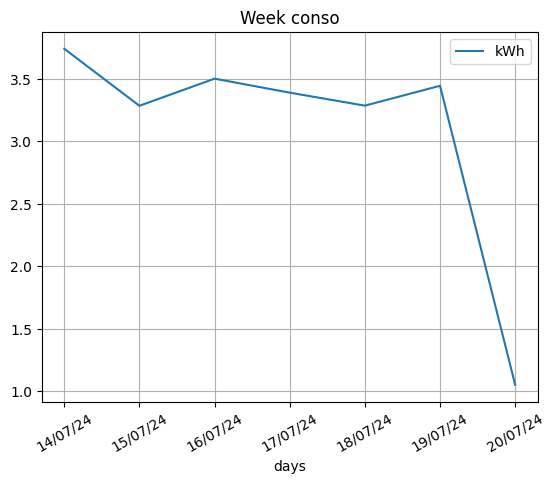

In [1033]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [1034]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [1035]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


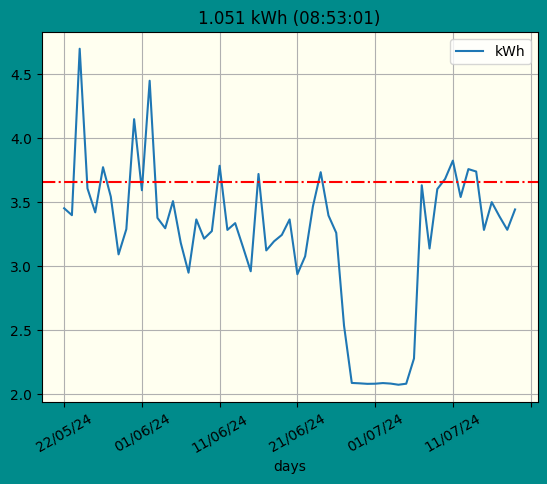

In [1036]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [1037]:
df_grp.mean()

kWh    3.655388
dtype: float64

In [1038]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
07/07/24,3.633
08/07/24,3.139
09/07/24,3.603
10/07/24,3.682
11/07/24,3.825
12/07/24,3.541
13/07/24,3.759
14/07/24,3.740
15/07/24,3.284


<Axes: xlabel='days'>

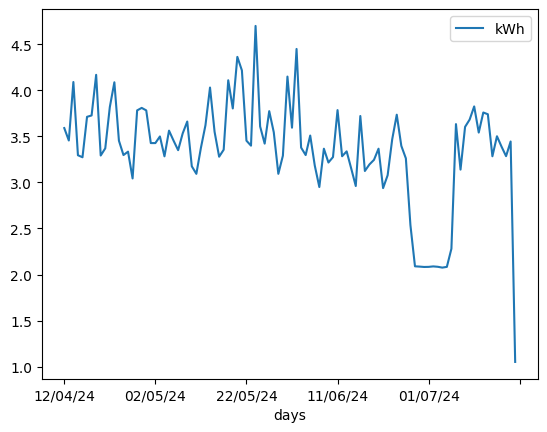

In [1039]:
df_grp.tail(100).plot()

In [1040]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.018500
std,0.661104
min,2.075000
25%,2.136750
50%,3.284500
75%,3.531000
max,3.825000


In [1041]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/07/24 3.825
04/07/24 2.075


In [1042]:
day

'20/07/24'

In [1043]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1223504,35118,0.10,35.118,102.511533,28788937925,2024-07-20 00:00:10.309254,20/07/24,0:0:10
1223505,31836,0.11,31.836,113.079533,28788969761,2024-07-20 00:00:42.145254,20/07/24,0:0:42
1223506,31906,0.11,31.906,112.831442,28789001667,2024-07-20 00:01:14.051254,20/07/24,0:1:14
1223507,33156,0.11,33.156,108.577633,28789034823,2024-07-20 00:01:47.207254,20/07/24,0:1:47
1223508,33456,0.11,33.456,107.604017,28789068279,2024-07-20 00:02:20.663254,20/07/24,0:2:20
...,...,...,...,...,...,...,...,...
1224550,26232,0.14,26.232,137.236962,28820759337,2024-07-20 08:50:31.721254,20/07/24,8:50:31
1224551,26232,0.14,26.232,137.236962,28820785569,2024-07-20 08:50:57.953254,20/07/24,8:50:57
1224552,26566,0.14,26.566,135.511556,28820812135,2024-07-20 08:51:24.519254,20/07/24,8:51:24
1224553,25848,0.14,25.848,139.275766,28820837983,2024-07-20 08:51:50.367254,20/07/24,8:51:50


In [1044]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 1223504 to 1224554
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1051 non-null   int64         
 1   kWh        1051 non-null   float64       
 2   sec        1051 non-null   float64       
 3   Wh         1051 non-null   float64       
 4   cumul(ms)  1051 non-null   int64         
 5   dates      1051 non-null   datetime64[ns]
 6   days       1051 non-null   object        
 7   heure      1051 non-null   object        
 8   hours      1051 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 82.1+ KB


In [1045]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1223504    00  0.10
  1223505    00  0.11
  1223506    00  0.11
  1223507    00  0.11
  1223508    00  0.11
  ...       ...   ...
  1223615    00  0.10
  1223616    00  0.10
  1223617    00  0.10
  1223618    00  0.10
  1223619    00  0.10
  
  [116 rows x 2 columns]),
 ('01',
          hours  kWh
  1223620    01  0.1
  1223621    01  0.1
  1223622    01  0.1
  1223623    01  0.1
  1223624    01  0.1
  ...       ...  ...
  1223728    01  0.1
  1223729    01  0.1
  1223730    01  0.1
  1223731    01  0.1
  1223732    01  0.1
  
  [113 rows x 2 columns]),
 ('02',
          hours  kWh
  1223733    02  0.1
  1223734    02  0.1
  1223735    02  0.1
  1223736    02  0.1
  1223737    02  0.1
  ...       ...  ...
  1223840    02  0.1
  1223841    02  0.1
  1223842    02  0.1
  1223843    02  0.1
  1223844    02  0.1
  
  [112 rows x 2 columns]),
 ('03',
          hours   kWh
  1223845    03  0.10
  1223846    03  0.11
  1223847    03  0.10
  1223848    03  0.10


In [1046]:
groupedbyhour.count()

,kWh
hours,
00,116
01,113
02,112
03,117
04,118
05,111
06,108
07,107
08,149


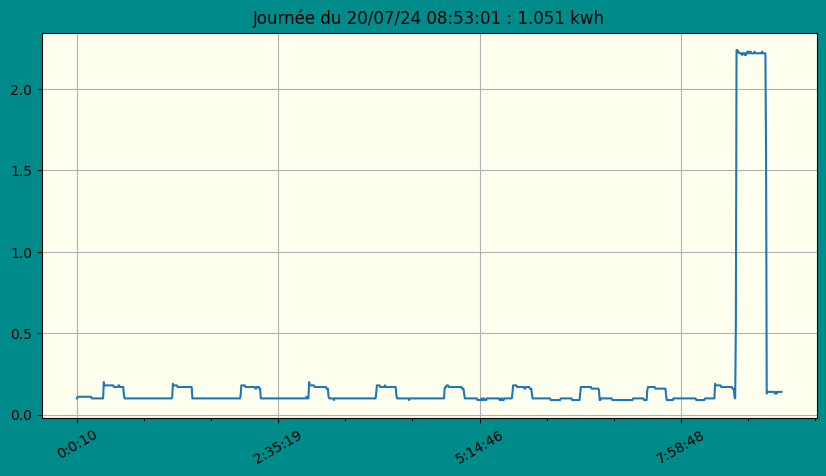

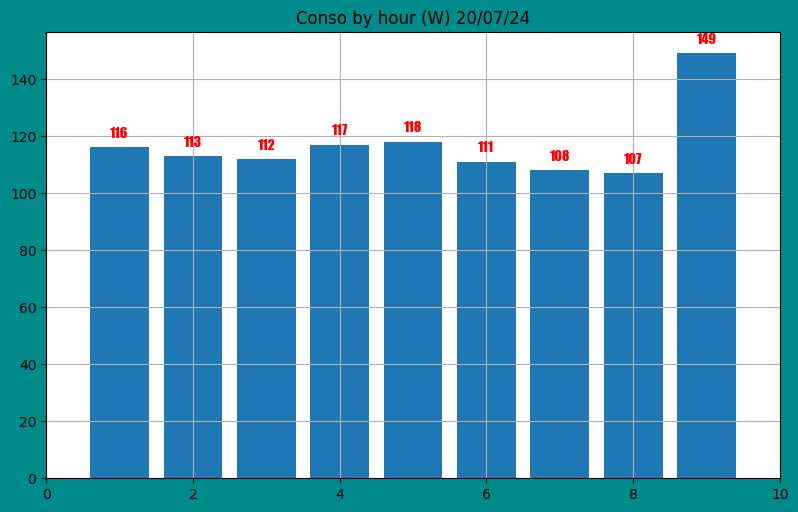

In [1047]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1048]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [1049]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1050]:
#conso_byhour(day)

In [1051]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

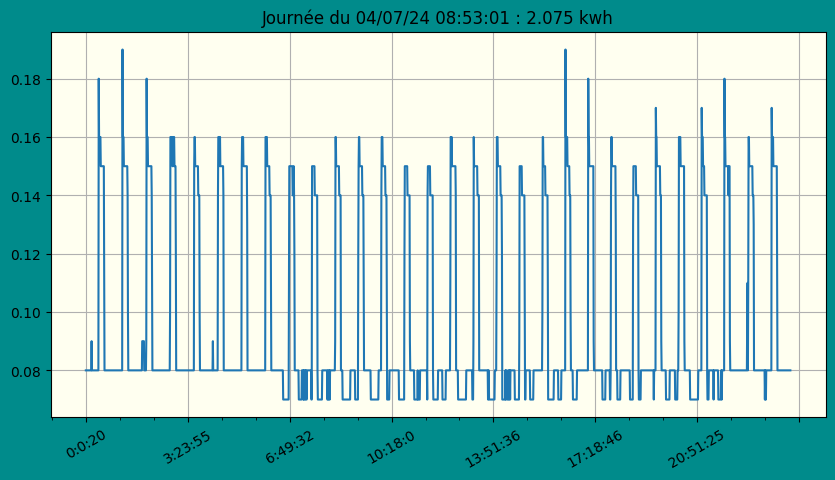

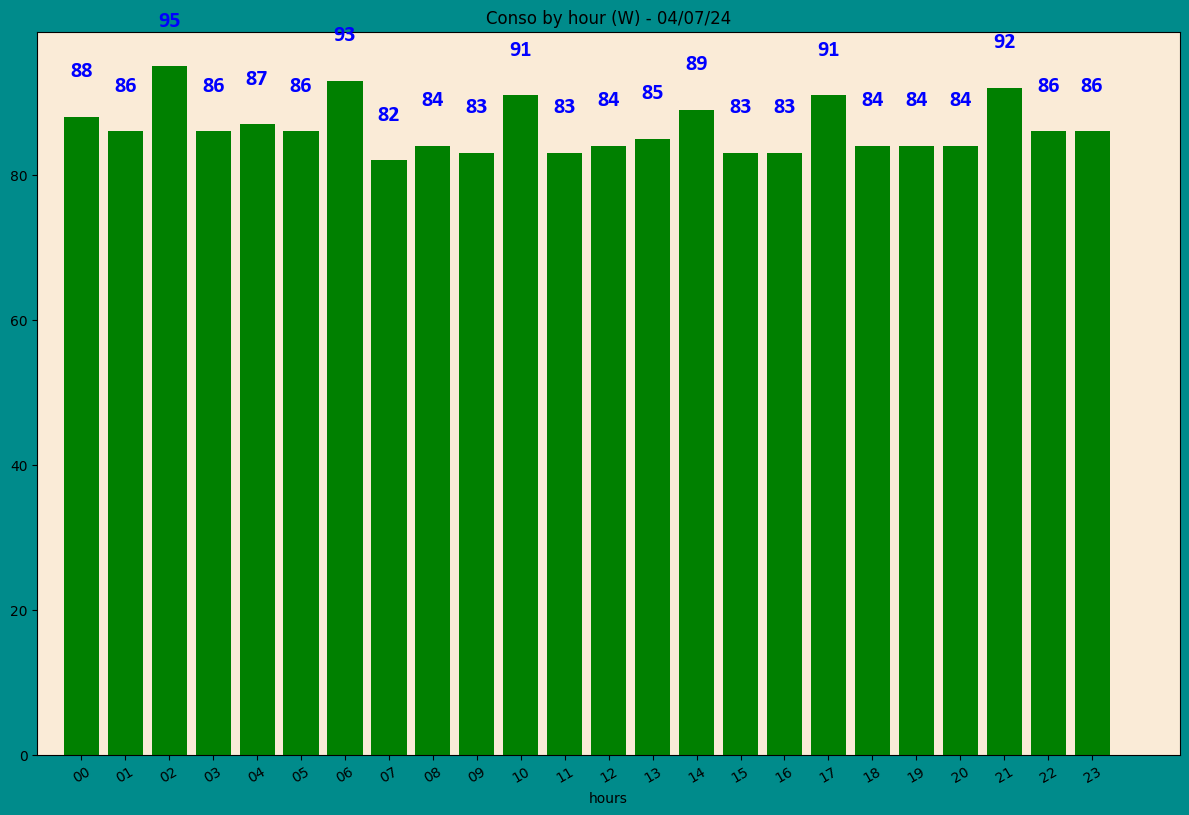

In [1052]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

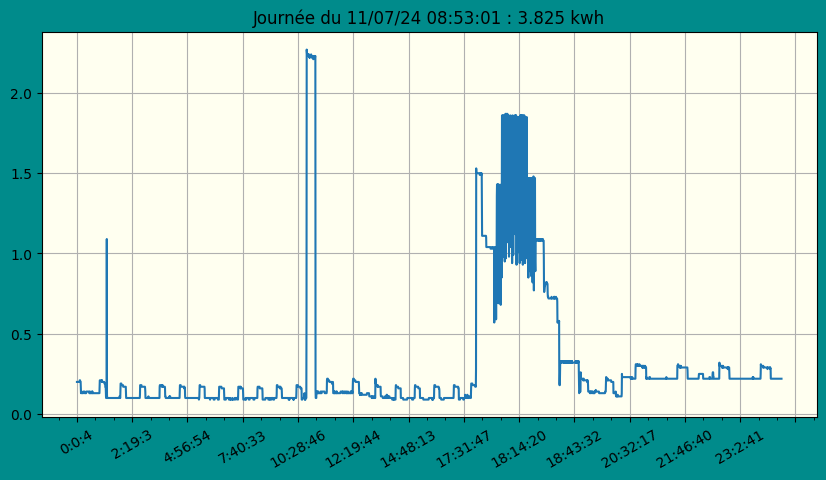

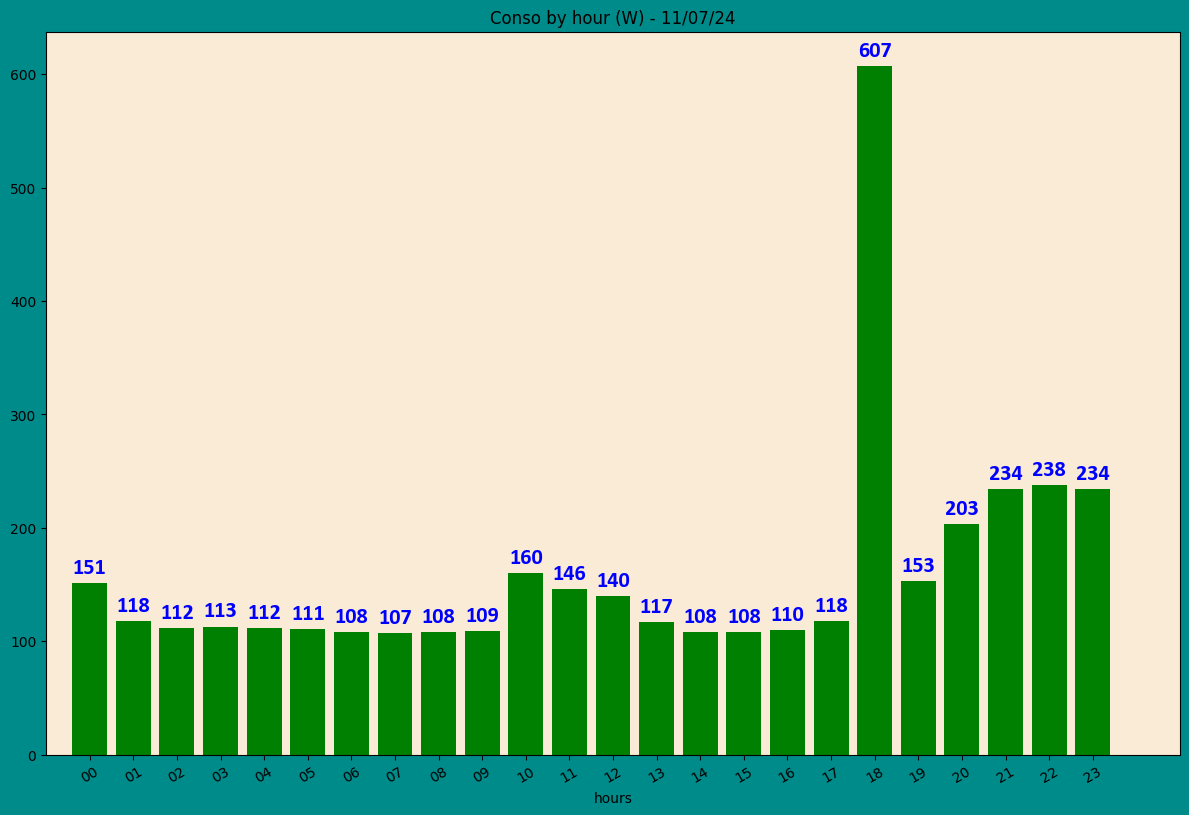

In [1053]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1054]:
filename='conso_data.csv'
#conso_data.to_csv(filename)